#  List of Hypothesis that may help boost revenue

 We are analysing at a big online store.The marketing department compiled a list of hypotheses that may help boost revenue.

## Goal
- To prioritize these hypotheses
- Launch an A/B test and analyze the results.


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st

import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
# Colecting data and laading data file into DataFrame

hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

##  Explore initial data

The dataset 'Hypo' contains the following fields:

- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

The dataset 'Orders' contains the following fields:

- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

The dataset 'Visits' contains the following fields:

- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified




## Exploring and Prepare the Data

Let's explore each df to get an initial understanding of the data and do necessary corrections to each table if necessary.

### Hypo

In [3]:
# Print sample of data
hypo.head()


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
# Print general information and summury of the data
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Check formissing values
hypo.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

### Fix data

In [6]:
# Replace the column names to the lowercase (make them lowercase)
hypo.columns = hypo.columns.str.lower()
# check it
hypo.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### Orders

In [7]:
# Print sample of the data
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
# Print genaral information/summury
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
# Check for missing values
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
# Let's check column 'date'
type(orders.date[0])

str

- Let's check if some of the visitors might have gotten into both group A and group B

In [11]:
orders.groupby(['visitorId'])['group'].count()

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [12]:
# Reviewer's code

(
    orders
    .groupby('visitorId')
    .agg(groups_count=('group', 'nunique'))
    .query('groups_count > 1')
    .head(5)
)

,groups_count
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2


- As we see some of visitors  were in both control groups
- There is mistakes in the original datasets which is supposed to be fixed it by dropping them
- We need to remove every vistor that was in both A and B groups while leaving the rest intact. 

### Fix data

In [13]:
# Rename columns in aproriate format
orders.rename(columns= {'transactionId':'transaction_id','visitorId':'visitor_id'}, inplace = True)
# check it
orders.head()


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
# Convert to Timestamps
#orders['date'] = pd.to_datetime(orders['date'],format ='%Y-%m-%d' )

orders['date'] = orders['date'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
# Check it again
type(orders.date[0])

pandas._libs.tslibs.timestamps.Timestamp

 We can get a list of users that are in just one group like this

In [16]:
# list of users with number of groups
group_counts = orders.groupby('visitor_id').agg({'group': 'nunique'})
group_counts

,group
visitor_id,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


In [17]:
# Filter for just users in 1 group
to_include = group_counts[group_counts['group'] == 1]
to_include

,group
visitor_id,
5114589,1
6958315,1
11685486,1
39475350,1
47206413,1
...,...
4259830713,1
4278982564,1
4279090005,1


In [18]:
# Then filter your original data according to which visitors are in that list:
orders = orders[orders['visitor_id'].isin(to_include.index)]

In [19]:
# Let's see the distribution of values in the `group` column 
orders['group'].value_counts(dropna=False)

B    548
A    468
Name: group, dtype: int64

In [20]:
# Check it if it works
orders.groupby(['visitor_id'])['group'].count()

visitor_id
5114589       1
6958315       1
11685486      1
39475350      1
47206413      1
             ..
4259830713    1
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 973, dtype: int64

### Visits

In [21]:
# Print sample 
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
# Print general information/summury
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [23]:
# check for missing values
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [24]:
# Let's see column ' date'
type(visits.date[0])

str

### Fix  the data

In [25]:
# Converting column'date' to Timestamps
#visits['date'] = pd.to_datetime(visits['date'], format = '%Y-%m-%d')

visits['date'] = visits['date'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [26]:
type(visits.date[0])

pandas._libs.tslibs.timestamps.Timestamp

###  Conclusions
- There is no missing values in dataset
- All data represent as object and int64
- The column 'date' in df was converted to Timestamps
- The columns name was changed to lowercase register and appropriate format
- There is mistakes in the original datasets 'orders',some vistors  was in both A and B group which is fixed it by dropping them

In [27]:
df1 = hypo.copy()
df_orders = orders.copy()
df_visits = visits.copy()

# Analysing data

##  Prioritizing Hypotheses

- The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
- The task is to:
- Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [28]:
hypo['hypothesis'].unique()

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

### ICE method




In [29]:
# Create new column ICE by using formula
hypo['ICE'] = hypo['impact'] * hypo['confidence'] / hypo['effort']

In [30]:
# New df
df_new = hypo[['hypothesis', 'ICE']]

In [31]:
# Display it by sorting in desc order
pd.options.display.max_colwidth = 150
display(df_new.sort_values(by = 'ICE', ascending = False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


- ICE give us 8, 0, 7, 6  are promising hypothesis.
- Number 8 were in first place because parameter Confidence have high value than others

### RICE method

In [32]:
# Calculate RICE for the hypotheses. Add the values you get to the existing table
hypo['RICE'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['effort']


In [33]:
# New df
df_new2 = hypo[['hypothesis', 'RICE']]

In [34]:
# Dislay it by sorting in desc order
pd.set_option('display.width', None)
display(df_new2.sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


- The most promising hypothesis are 7, 2, 0 and 6. 
- However this time number 7 was in first time.
- That's because it's Reach parameter have high value  wich is 10 , while other hypothesis have lower values

In [35]:
pd.options.display.max_colwidth = 150
display(hypo)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


## A/B Test Analysis

In [36]:
orders['date']= pd.to_datetime(orders['date'],dayfirst=True)
orders['date']

0      2019-08-15
1      2019-08-15
3      2019-08-15
4      2019-08-15
5      2019-08-15
          ...    
1191   2019-08-14
1192   2019-08-14
1193   2019-08-14
1194   2019-08-14
1196   2019-08-15
Name: date, Length: 1016, dtype: datetime64[ns]

In [37]:
visits['date'] = pd.to_datetime(visits['date'],dayfirst=True)
visits['date']

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
        ...    
57   2019-08-27
58   2019-08-28
59   2019-08-29
60   2019-08-30
61   2019-08-31
Name: date, Length: 62, dtype: datetime64[ns]

### Graph cumulative revenue by group. Make conclusions and conjectures.

Before we move on to plotting cumulative graphs for metrics, let's  build an array with unique paired date-group values using the drop_duplicates() method, than  collect the aggregated cumulative daily data and  merge the two tables into one 

In [38]:
# Building an array with unique paired date-group values

datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [39]:
#Getting aggregated cumulative daily data on orders by  declare the 'ordersAggregated' variable to store

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
    orders['group'] == x['group'])].agg({'date' : 'max','group' : 'max','transaction_id' : pd.Series.nunique,'visitor_id' : pd.Series.nunique,
     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [40]:
# Getting aggregated cumulative daily data on visitors 

visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [41]:
# Merging the two tables into one and giving its columns descriptive names
# Define the variable 'cumulativeData' 
# by joining ordersAggregated and visitorsAggregated by the columns 'date' and 'group' with the merge() method.

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head()

,date,group,transaction_id,visitor_id,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [42]:
# Giving its columns descriptive names
cumulativeData.columns =['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(5))


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [43]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
# Declare the variables 'cumulativeRevenueA' and 'cumulativeRevenueB',where you'll store the data on dates, revenue, and number of orders for groups A and B


cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [44]:
#DataFrame with cumulative orders and cumulative revenue by day, group B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


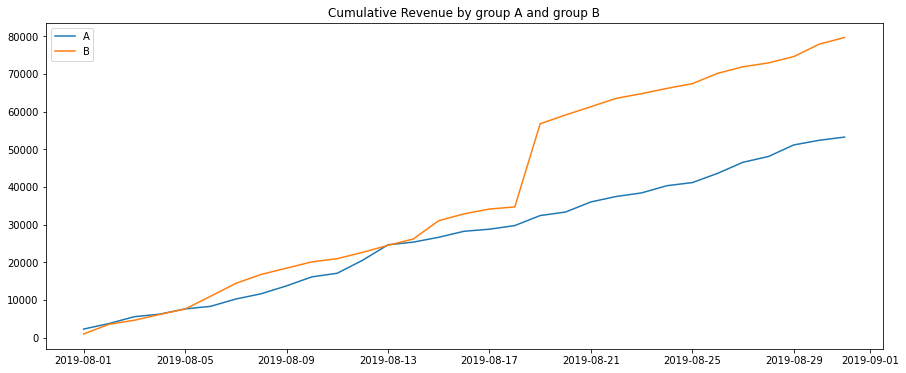

In [45]:
#Plot graphs of daily cumulative revenue for each group.
plt.rcParams["figure.figsize"] = (15,6)

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative Revenue by group A and group B')
plt.legend() 
plt.show()


- Revenue is rising steadily troughout the whole test. That's a good sign.
-However, we can see Spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

### Graph cumulative average order size by group. Make conclusions and conjectures.

To find cumulative avarage order size We'll divide cumulative revenue by the cumulative number of orders

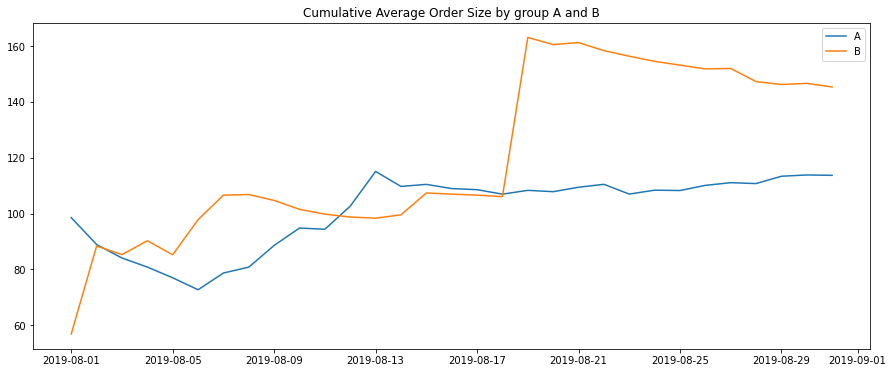

In [46]:
#Let's plot average purchase size by group. We'll divide cumulative revenue by the cumulative number of orders

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Cumulative Average Order Size by group A and B')
plt.show()

- The cumulative avarage purchase size metrics of the group B(orange line) are a bit  higher than those of the group A(blue line)
- The surge in group B may have been due to the presence of large, expensive orders. We need more data on this group to find the true average purchase size and establish its level.

###  Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
Before to plot relative difference graphs we calculate each of points as follows: group B cumulative metric / group A cumulative metric - 1.

In [47]:
# Gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()


,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


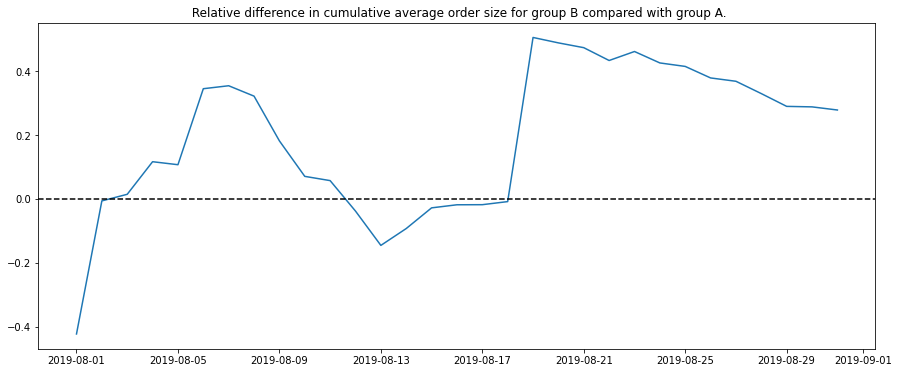

In [48]:
# Plotting relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title(' Relative difference in cumulative average order size for group B compared with group A.')
plt.show()


- As we see several surges between July 5 and 9, and second surge in July 17 and going up

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.
Before plotting we going to calculate each group's conversion rate as the ratio of orders to the number of visits for each day

In [49]:
# Culcilating conversion 
cumulativeData['conversion'] = ( cumulativeData['orders'] / cumulativeData['visitors'])
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [50]:
# Selecting data on group A and B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB= cumulativeData[cumulativeData['group'] == 'B']
display(cumulativeDataA.head())
display(cumulativeDataB.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


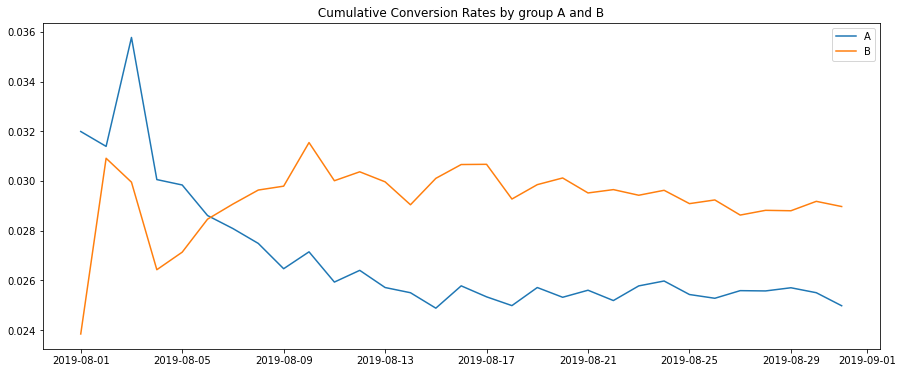

In [51]:
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title(' Cumulative Conversion Rates by group A and B ')
plt.show()



- As we see at the beginning of the test we observed sharp surge in favor of group A (blue line) than  the results changed to stabilizing line 
- and  group B(orange line) is leading 
- However we stil see some fluctuations during the test 

In [52]:
#overall conversion rate for group A :
cumulativeDataA['orders'].sum()/cumulativeDataA['visitors'].sum()

0.02585769760495693

In [53]:
#overall conversion rate  for  group B :
cumulativeDataB['orders'].sum()/cumulativeDataB['visitors'].sum()

0.02943091972438227

### Relative difference graph for the cumulative conversion rates of group B compared with that of group A. 

In [54]:
#Join the tables cumulativeDataA and cumulativeDataB using the merge() method,
#so that the resulting table contains the columns ['date', 'conversionA', 'conversionB']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                 left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


(18109.0, 18139.0, -0.5, 0.5)

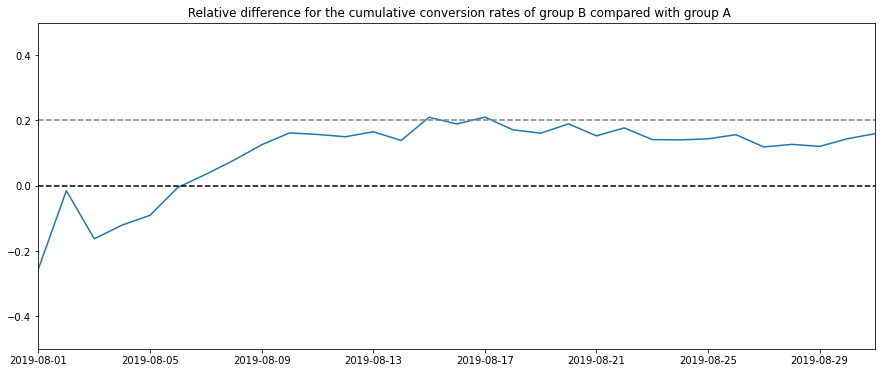

In [55]:
# Plotting relative difference graph for the conversation 

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# Using the plt.axhline() method, add a dotted-line X-axis (Y = 0) and set its color as 'black'. 
# Add another 'grey' X-axis at Y = 0.2.
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title(' Relative difference for the cumulative conversion rates of group B compared with group A')

#Set the scale of the axes as follows: plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5]).
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])


- The conversion rate gradually growing

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

Before plotting we are going to culculate number of orders per users

In [56]:
# Define df orders_by_user and culculate number of orders

orders_by_user = ( orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_user.head()

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [57]:
# Rename it ccolumns
orders_by_user.columns = ['buyers', 'n_orders']

orders_by_user.sort_values(by='n_orders', ascending=False).head(10)

,buyers,n_orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


- There are buyer with 3, 2 orders 

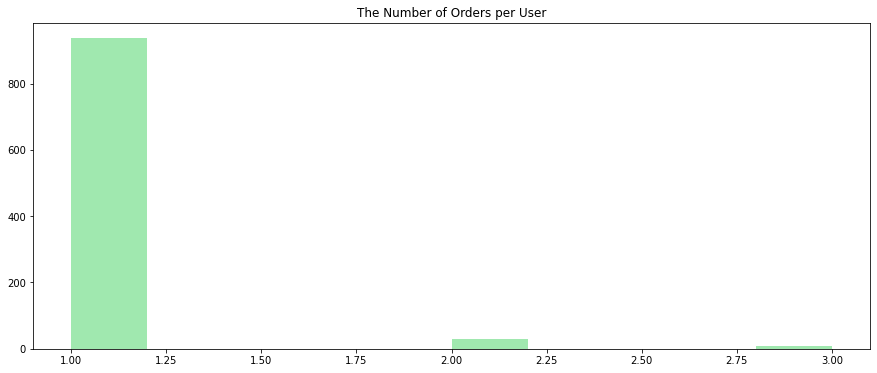

In [58]:
import matplotlib.pyplot as plt


# Let's plot a distribution histogram with the number of orders per user.
plt.hist(orders_by_user['n_orders'],color=['#A0E8AF'])
plt.title('The Number of Orders per User')
plt.show()


- As we see outliers with orders 2 and 3


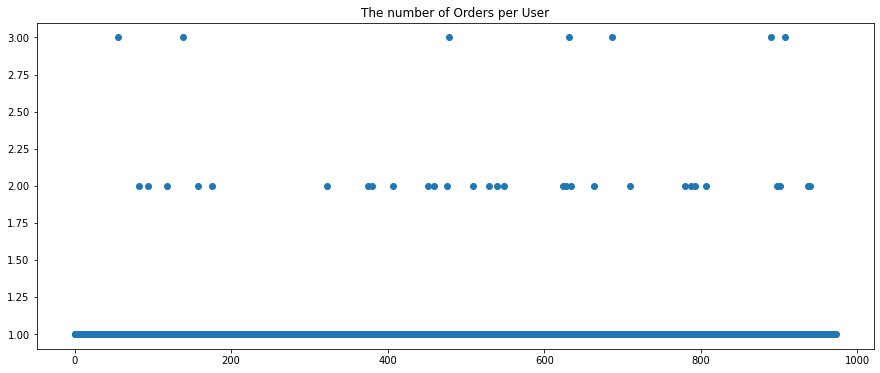

In [59]:
# Let's plot a scatter chart with the number of orders per user:

# We can find the values for the horizontal axis in the precode, in x_values
x_values = pd.Series(range(0,len(orders_by_user)))
plt.scatter(x_values, orders_by_user['n_orders'])
plt.title('The number of Orders per User')
plt.show()


- There are outliers with orders 2 and 3 orders per user
- Anomaly is a value that appears rarely in a statistical population but can introduce error when it does.


### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [60]:
# Let's find  percentiles by  np.percentile('column', [percentile1, percentile2, percentile3]) method 

display(np.percentile(orders_by_user['n_orders'], [95, 99])) 

array([1., 2.])

- 5% of users placed 1 order, and 1% of users made more than 2.

In [61]:
df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


### Plot a scatter chart of order prices. Make conclusions and conjectures.
Before plotting we are going to culculate orders prices(revenue) per users

In [62]:
orders.sort_values(by='revenue',ascending=False).head(10)


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A
949,1347999392,887908475,2019-08-21,930.0,A
940,2420050534,4003628586,2019-08-08,905.8,B
613,4071177889,3931967268,2019-08-07,830.3,B


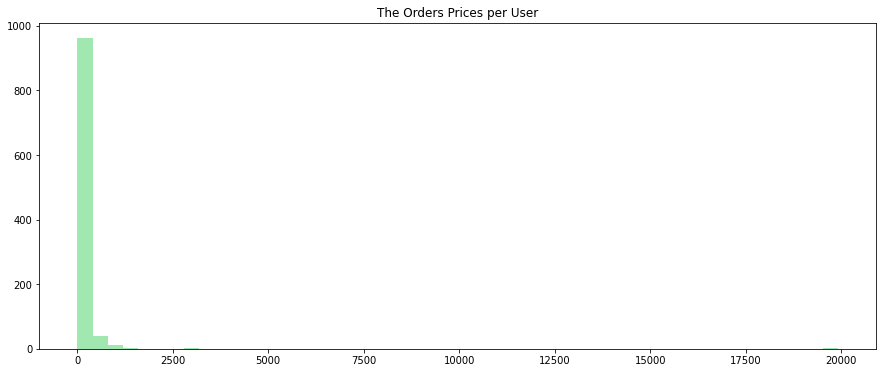

In [63]:
plt.hist(orders['revenue'],color=['#A0E8AF'], bins = 50) 
plt.title('The Orders Prices per User')
plt.show()

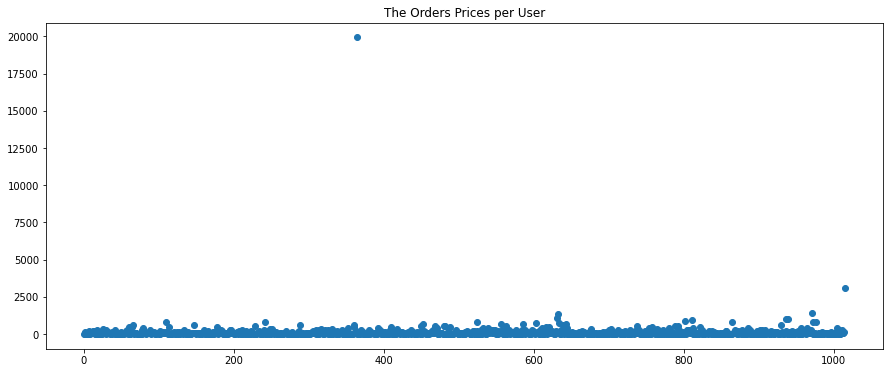

In [64]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('The Orders Prices per User')
plt.show()

-  there are several big orders.


### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [65]:
# Let's determine the 95th  and 99th percentiles for revenue in our sample:
np.percentile(orders['revenue'], [ 95, 99]) 

array([414.275, 830.3  ])

## Test  hypotheses

- null hypothesis H₀:Test the hypothesis that difference of  the proportions will be zero, there’s no difference.

- hypothesis H₁: Test the hypothesis that difference of  the proportions are not equal, there is difference.

- alpha value - 5%

- Before we going to testing we should retrive group A and group B and  calculate the statistical significance of the difference in conversion between the groups.


In [66]:
import scipy.stats as stats
import datetime as dt


### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [67]:
# Let's create the variables ordersByUsersA and ordersByUsersB with the columns ['userId', 'orders']

ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()


,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [68]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. 

Those who didn't order anything will have 0.

This is necessary to prepare the samples for the Mann-Whitney test.

In [69]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [70]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


 To Calculate the statistical significance of the difference in conversion based on the results we are going to

Apply the **Mann-Whitney test**.

In [71]:
# We'll apply the criterion and format the p-value by rounding it to three decimal places.
# Print the p-value to compare the groups' conversion. Round it to three decimal places.

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


# To get the group's conversion rate, we'll need to divide the sum of the orders by the number of users. 
# Using the mean() method, we'll find the mean for sampleA
# Calculate and print the relative difference in conversion between the groups. Round the result to three decimal places.


print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


#### Conclusion : 

- Based on row data p-value is lower than 0.05 so we reject the null hypothesis.There is a difference between groups A and B.
- The row data anylisis showed that group's conversion rates have statistically significant differancies.
- The ralative conversion gain for group B compared with group A is 16%

###  Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Remember that the 95th and 99th percentiles for average order size were 414.275 and  830.3. For number of users, the 95th and 99th percentiles were  2 and  3 orders.

We'll remove the 1% of users with the most orders and between 1% and 5% of the most expensive orders.

First we need to identify anomalous orders and  find the total number of anomalous users using the shape() method.



In [72]:
# First we need to identify anomalous orders and  find the total number of anomalous users using the shape() method.
# Users with many orders
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithManyOrders.head()

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
Name: userId, dtype: int64

In [73]:
# Users with expensive orders
usersWithExpensiveOrders = orders[orders['revenue'] > 400]['visitor_id']
usersWithExpensiveOrders.head()

73     2947100995
77      787824685
78     3288820196
93      943674707
131    2254586615
Name: visitor_id, dtype: int64

In [74]:
# The total number of anomalous users 
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
#
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
dtype: int64
(63,)


- We have 63 anomalous users in total

We'll calculate the statistical significance of the differences in conversion between the groups, using filtered data. 

First we'll prepare samples of the number of orders per user for each test group:

In [75]:
# Remove the anomalous visitors and calculate the statistical significance of the difference in conversion.

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [76]:
# Let's apply the statistical Mann-Whitney criterion to the resulting samples:
#Print the p-value to compare the conversion rates of the filtered groups
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

#Print group B's relative gain rounded to three decimal places.

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.016
0.176


#### Conclusion:
- The p-value is lower than 0.05. so we can  reject null hypotesis so there is differencies
- The relative gain is 17.7%
- The segment B more much better than segment A

### Find the statistical significance of the difference in average order size between the groups using the Raw data. Make conclusions and conjectures.

- To calculate the statistical significance of the difference in the segments' average order size, we'll pass the data on revenue to the  **mannwhitneyu() criterion**.

- We'll also find the relative difference in average order size between the groups:

In [77]:
# Print the p-value to compare the groups' average order sizes. Round it to three decimal places.
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Print out the relative gain for group B, again rounding the value to three decimal places
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


#### Conclusion:
- The p-value is considerably higher than 0.05, so  there is no statistically significant differences and conclude that average order size not differs between the groups.
- However the relative diffencies is 27.8% so the average order size for group A is much smaller than it is for group B.


### Find the statistical significance of the difference in average order size between the groups using the Filtered data. Make conclusions and conjectures.

 For removed the anomalies(see above)  we'll calculate the statistical significance for the difference in average order size.

In [78]:
# Let's see what happens to the values for average order size:

# Print the p-value to compare the average order sizes of the filtered groups. Round it to three decimal places. 
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
     np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

#  Print group B's relative gain rounded to three decimal places. 
print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 



0.575
-0.070


#### Conclusion: 

- The p-value is greater than 0.05 and decreased

- But now the difference between the segments is only 7% instead of 27.8%  so we got statistically difference between the group's avarage order size. This means that filltered out the outliers decrease the amount of noise in the data

### Make a decision based on the test results. The possible decisions are: 

- 1. Stop the test, consider one of the groups the leader. 

- 2. Stop the test, conclude that there is no difference between the groups.

- 3. Continue the test

1. ROW DATA CONVERSION : (0.011, 0.160 )

Based on row data p-value is lower than 0.05 so we reject the null hypothesis.There is a difference between groups A and B.
The row data anylisis showed that group's conversion rates have statistically significant differancies.
The ralative conversion gain for group B compared with group A is 16%

1. FILTERED DATA CONVERSION RATE: (0.016,0.176) 

The p-value is lower than 0.05. so we can reject null hypotesis so thee is differencies
The relative gain is 17.6%
The segment B more much better than segment A

2. ROW DATA AVARGE ORDER SIZE: (0.862, 0.278)

The p-value is considerably higher than 0.05, so there is no statistically significant differences and conclude that average order size not differs between the groups.
Moreover the relative diffencies is only 27,8% so the average order size for group A is much smaller than it is for group B.

2. FILTERED DATA FOR AVARGE ORDER SIZE: (0.575, -0.070)
The p-value is greater than 0.05 and increased
But now the difference between the segments is 7% instead of 27.8% so we got statistically difference between the group's avarage order size. This means that filltered out the outliers decrease the amount of noise in the data



### Conclusion:
- Contininue the test because we have differencies between metrics :
- group B leading in convesion rate  and avarage order size is same but ralative gain greater by 7%

# General conclusion

1. In the data's preparation & exploration stage:
- We observed missing values of columns in Dataframe
- There is no missing values in our dataset
- As we see some of visitors  were in both control groups.There is mistakes in the original datasets 'orders', so fixed it by dropping them

2. In the data transformation and data-cleaning process stage:
- The data in columns represented as object so it was converted to Timestamp
- The columns name was changed to lowercase register and appropriate format

3. In analysis stage to answer our questions we got next conclusion:

- 3.a Prioritizing Hypotheses by RICE method:
-    The most promising hypothesis are 7, 2, 0 and 6.
-    However this time number 7 was in first time.
-    That's because it's Reach parameter have high value wich is 10 , while other hypothesis have lower values


- 3.b Prioritizing Hypotheses by ICE method:
-    ICE give us 8, 0, 7, 6 are promising hypothesis.
-    Number 8 were in first place because parameter Confidence have high value than others


- 3.c We culculate and plotting Cumulative  metrics:
- Revenue is rising steadily throughout the whole test for bouth groups. That's a good sign but group B is leading
- The  cumulative avarage purchase size metrics of the group B are a bit higher than those of the group A
- The surge in group B may have been due to the presence of large, expensive orders. We need more data on this group to find the true average purchase size and establish its level.

- 3.d We detect anomalies(outliers) which is affect to analysis and was removed

4. A/B testing:
- we made decision based on result to Continue the test because we have differences between metrics : group B leading in conversion rate and avarage order size is same but relative gain greater by 7%.it's too early























